<a href="https://colab.research.google.com/github/Jalandhar525/SHALA2020/blob/master/DS_L3_20_April_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Assignment - 3: Improving Graphs**

---
Course website: [SHALA-2020](https://shala2020.github.io/)

This assignment will get you familiarized with improving plots/graphs in Python. 

---
## Part 1 - Importing packages and loading data 
---

###Import the following libraries:  

* ```numpy``` with an alias name ```np```, 
* ```pandas``` with an alias name ```pd```, 
* ```matplotlib.pyplot``` with an alias name ```plt```, and 
* ```seaborn``` with an alias name ```sns```. 

*You are free to use any other popular libraries*. 

In [0]:
# Load the libraries with their aliases 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Using the files ```train.csv``` and ```moviesData.csv```,  peform the following:

* Load these file as ```pandas``` dataframes and store it in variables named ```train``` and ```movies``` respectively. 
* Print the first ten rows of ```train``` and last ten rows of ```movies```. 

In [98]:
# Load train.csv and movies.csv 
url_train = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/DataScience/L2/train.csv"
train = pd.read_csv(url_train)

# Print the first ten rows of train
train.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,20,4,1,3,12,3,2,1,0,0,0,6
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,1,0,0,0,7
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,2,3,9,7,1,8,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,7,7,7,9


In [100]:
# Load movies.csv
url_movies = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2/moviesData.csv"
movies = pd.read_csv(url_movies)

# Print the last ten rows of movies 
train.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
1018,36,0,Travel_Rarely,172,Research & Development,4,4,Life Sciences,1,1435,1,Male,37,2,2,Laboratory Technician,4,Single,5810,22604,1,No,16,3,3,0,10,2,2,10,4,1,8,1018
1019,36,0,Travel_Rarely,329,Sales,16,4,Marketing,1,1436,3,Female,98,2,2,Sales Executive,1,Married,5647,13494,4,No,13,3,1,2,11,3,2,3,2,0,2,1019
1020,47,0,Travel_Rarely,465,Research & Development,1,3,Technical Degree,1,1438,1,Male,74,3,1,Research Scientist,4,Married,3420,10205,7,No,12,3,3,1,17,2,2,6,5,1,2,1020
1021,25,1,Travel_Rarely,383,Sales,9,2,Life Sciences,1,1439,1,Male,68,2,1,Sales Representative,1,Married,4400,15182,3,No,12,3,1,0,6,2,3,3,2,2,2,1021
1022,37,0,Non-Travel,1413,Research & Development,5,2,Technical Degree,1,1440,3,Male,84,4,1,Laboratory Technician,3,Single,3500,25470,0,No,14,3,1,0,7,2,1,6,5,1,3,1022
1023,56,0,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0,1023
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6,1024
1025,24,0,Travel_Rarely,1476,Sales,4,1,Medical,1,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3,1025
1026,32,0,Travel_Rarely,601,Sales,7,5,Marketing,1,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3,1026
1027,34,0,Travel_Rarely,401,Research & Development,1,3,Life Sciences,1,1447,4,Female,86,2,1,Laboratory Technician,2,Married,3294,3708,5,No,17,3,1,1,7,2,2,5,4,0,2,1027


---
## Part 2 - Drawing correlation and heatmap 
---

### Using the correlation matrix, peform the following:

* Find the correlation matrix for the ```movies```.  
* Draw a **heatmap** with the correlation matrix and display the values of correlation coefficients for each pair of features. Make sure the values are properly visible. You might want to adjust the figure size for this. 
* Create a ```mask``` to remove the duplicate values from the **heatmap**. 

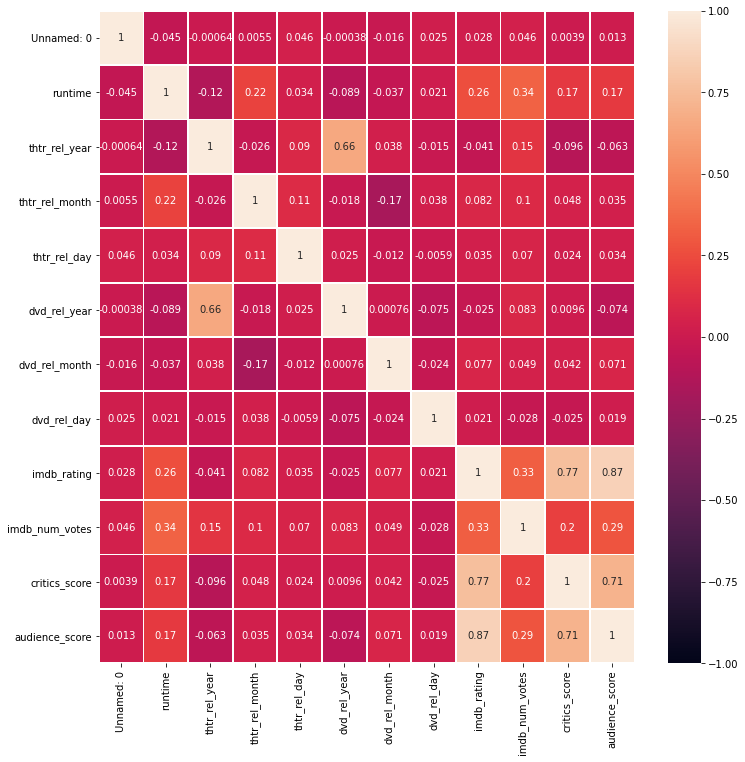

In [101]:
# Find out the correlation matrix 
movies_corr=movies.corr()

# Draw the heatmap 
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(movies_corr,annot=True,linewidths=0.8,ax=ax,vmin=-1)



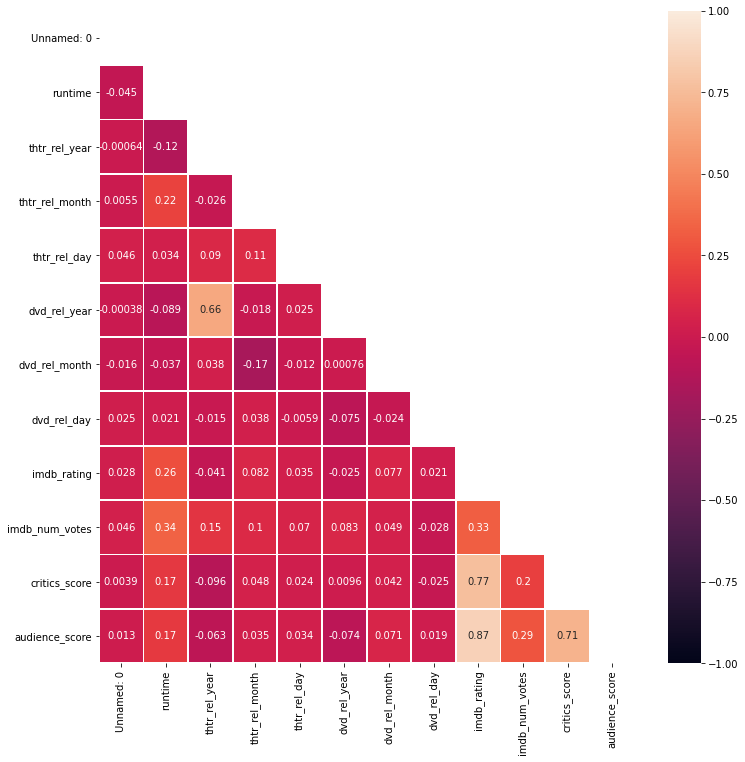

In [102]:
# Creating a mask for removing duplicates 
fig, ax = plt.subplots(figsize=(12,12))
mask = np.zeros(movies_corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))]=True
sns.heatmap(movies_corr,annot=True,linewidths=0.8,mask=mask,ax=ax,vmin=-1)

---
## Part 3 - Drawing plots and customizing these 
---

### Using a histogram, peform the following:

* Draw a histogram of all the numeric features in ```train```. Please note that this can be done in a single command.  

* Find out whether there is any redundant features in ```train```, which can be dropped while building a model. 

,Age,Attrition,BusinessTravel,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,0,Travel_Rarely,1255,Research & Development,2,Life Sciences,1441,1,Female,90,3,1,Research Scientist,1,Married,2066,10494,2,No,22,4,4,1,5,3,4,3,2,1,0
1024,47,0,Travel_Rarely,359,Research & Development,4,Medical,1443,1,Female,82,3,4,Research Director,3,Married,17169,26703,3,No,19,3,2,2,26,2,4,20,17,5,6
1025,24,0,Travel_Rarely,1476,Sales,1,Medical,1445,4,Female,42,3,2,Sales Executive,3,Married,4162,15211,1,Yes,12,3,3,2,5,3,3,5,4,0,3
1026,32,0,Travel_Rarely,601,Sales,5,Marketing,1446,4,Male,97,3,2,Sales Executive,4,Married,9204,23343,4,No,12,3,3,1,7,3,2,4,3,0,3


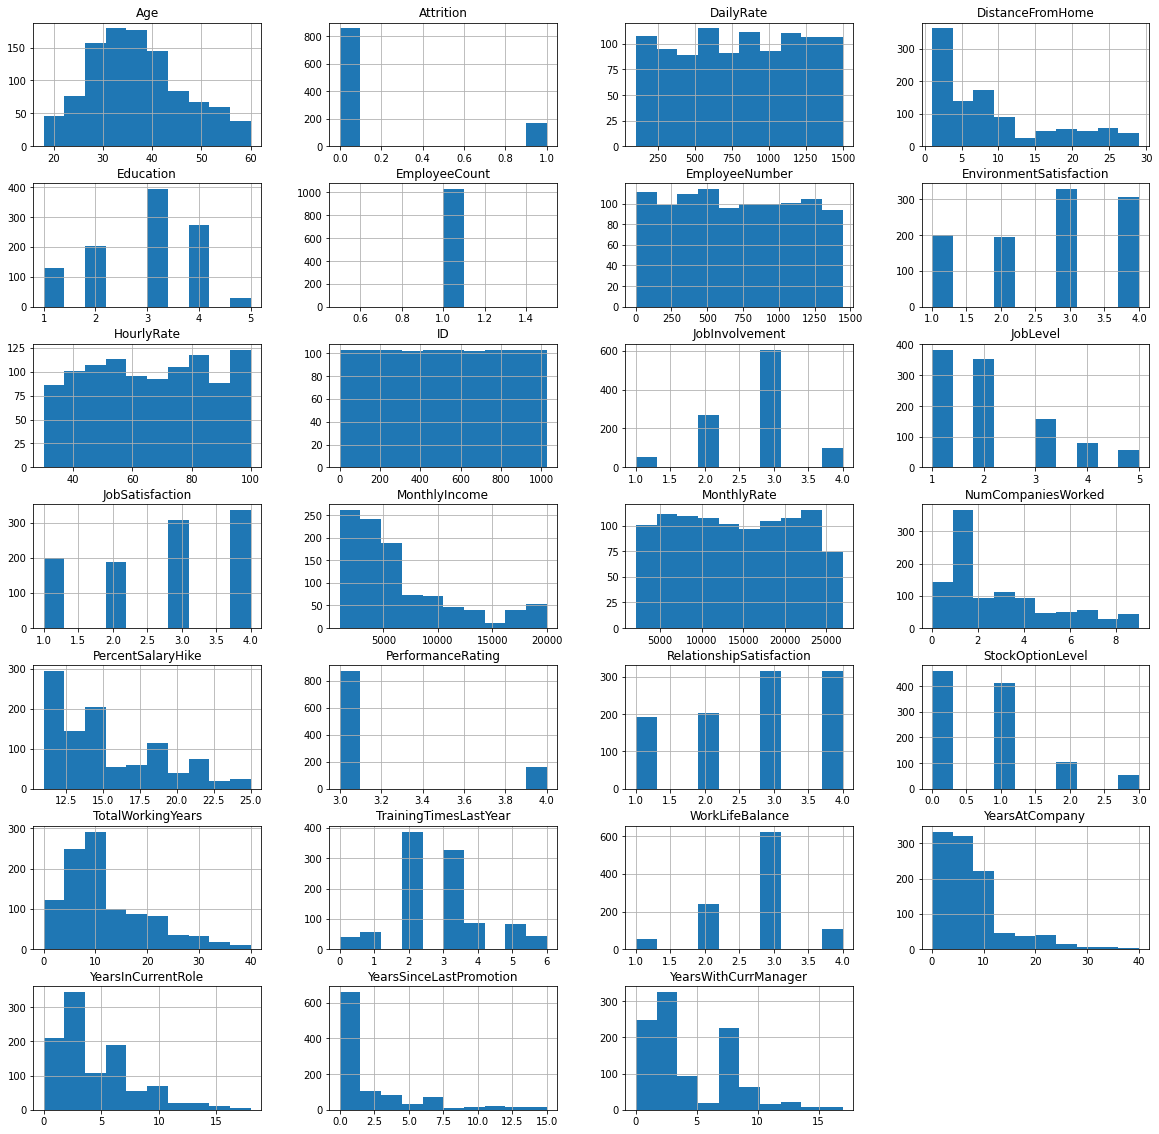

In [103]:
# Draw a histogram 
train.hist(figsize=(20,20),layout=(7,4))
# Find out the redundant features 
#distance from home,Id,EmployeeCount won't have any effect on target output
#Removing redundant features
train.drop(columns=['ID','DistanceFromHome','EmployeeCount'])


### Using a scatter plot, perform the following:

* Draw a scatter plot between between ```imdb_rating``` and ```audience_score```, and also fit a regression line.
* Change the color of marker to red, size to 200, transparency to 0.3.    



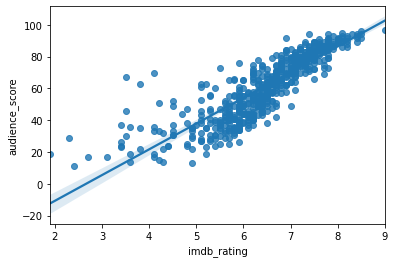

In [104]:
# Scatter plot to fit the regression line 
sns.regplot(x = movies["imdb_rating"], 
            y = movies["audience_score"], 
            marker="o", fit_reg=True)

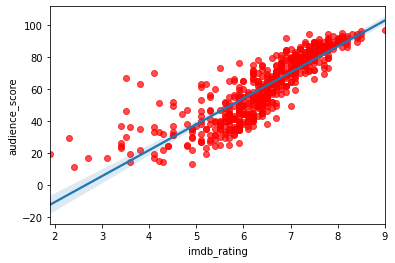

In [105]:
# Change marker of the scatter plot
sns.regplot(x = movies["imdb_rating"], 
            y = movies["audience_score"], 
            marker="o", fit_reg=True,scatter_kws={"color":"red", "alpha":0.7})

### Using a scatter plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw a scatter plot between between ```petal_length``` and ```petal_width``` and color it according to the ```species```.
* Change the size of marker to 100 and place the legend in ```lower right```. 

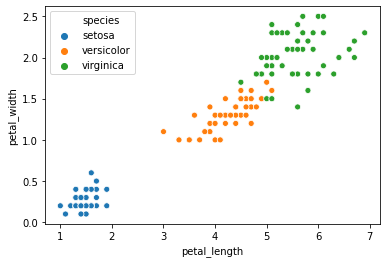

In [106]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Use the 'hue' argument to provide a factor variable
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue="species",legend='brief')
 
# Move the legend to an empty part of the plot



---
## Part 4 - Density Plots  
---

### Using density plots, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots for all the features ```sepal_width```, ```sepal_length```, ```petal_width```, and ```petal_length```. You can required to use subplots for plotting all the density plots. 
* Try drawing a [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function) of these features. There is a [blog on medium](https://medium.com/@rishav.jnit/exploratory-data-analysis-eda-on-iris-dataset-using-python-cadd850c1fc6) on how to plot CDF. It will be covered in tutorial. 

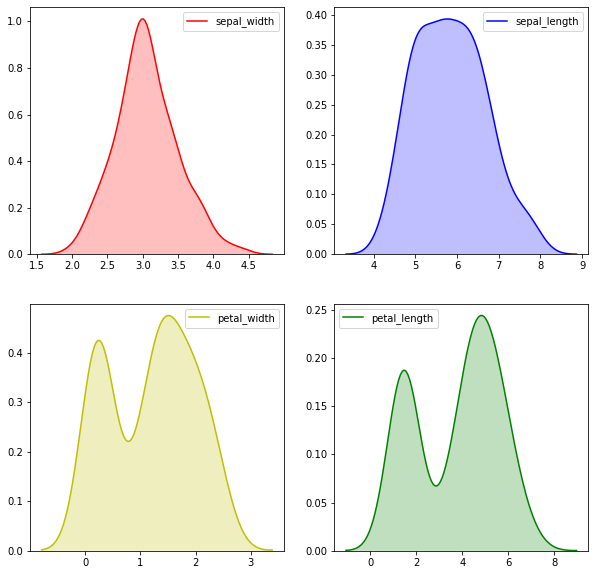

In [107]:
# library and dataset 
df = sns.load_dataset('iris')
fig,ax=plt.subplots(2,2)
fig.set_size_inches((10,10))
p1=sns.kdeplot(df['sepal_width'], shade=True, color="r",ax=ax[0,0])
p2=sns.kdeplot(df['sepal_length'], shade=True, color="b",ax=ax[0,1])
p3=sns.kdeplot(df['petal_width'], shade=True, color="y",ax=ax[1,0])
p4=sns.kdeplot(df['petal_length'], shade=True, color="g",ax=ax[1,1])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: VisibleDepre

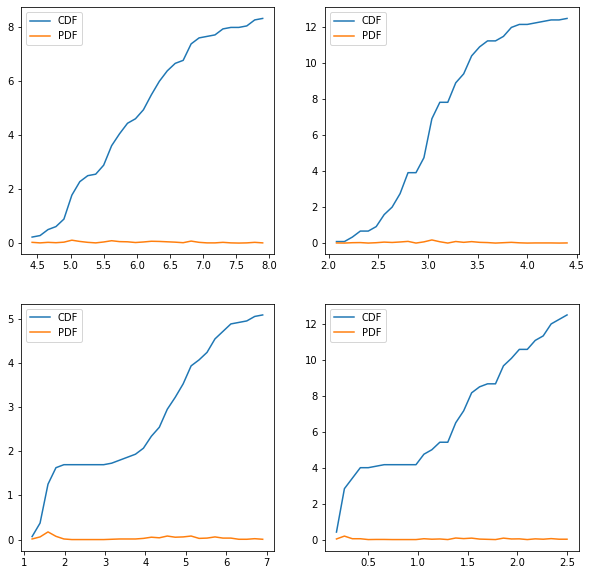

In [109]:
#Cumulative Distribution Function
num_bins = 30
fig,ax=plt.subplots(2,2)
fig.set_size_inches(10,10)
counts, bin_edges = np.histogram (df['sepal_length'], bins=num_bins, normed=True)
pdf1 = counts/(sum(counts))
cdf1 = np.cumsum (counts)
ax[0,0].plot (bin_edges[1:], cdf1,label="CDF")
ax[0,0].plot (bin_edges[1:], pdf1,label="PDF")
ax[0,0].legend(loc=0)

counts, bin_edges = np.histogram (df['sepal_width'], bins=num_bins, normed=True)
pdf2 = counts/(sum(counts))
cdf2 = np.cumsum (counts)
ax[0,1].plot (bin_edges[1:], cdf2,label="CDF")
ax[0,1].plot (bin_edges[1:], pdf2,label="PDF")
ax[0,1].legend(loc=0)

counts, bin_edges = np.histogram (df['petal_length'], bins=num_bins, normed=True)
pdf3 = counts/(sum(counts))
cdf3 = np.cumsum (counts)
ax[1,0].plot (bin_edges[1:], cdf3,label="CDF")
ax[1,0].plot (bin_edges[1:], pdf3,label="PDF")
ax[1,0].legend(loc=0)

counts, bin_edges = np.histogram (df['petal_width'], bins=num_bins,normed=True)
pdf4 = counts/(sum(counts))
cdf4 = np.cumsum (counts)
ax[1,1].plot (bin_edges[1:], cdf4,label="CDF")
ax[1,1].plot (bin_edges[1:], pdf4,label="PDF")
ax[1,1].legend(loc=0)

### Using violin plot, perform the following:

* Load the dataset ```iris```. This has been done for you.
* Draw the density plots of ```species``` versus ```sepal_length```.
* Assign each group a color like 

    * versicolor - green, 
    * setosa - blue,   
    * virginica - m

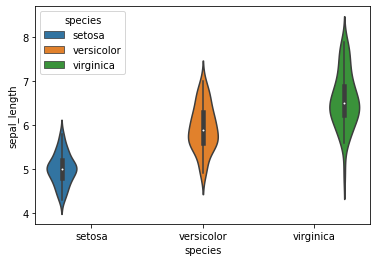

In [110]:
# Draw the normal violin plots 

sns.violinplot(x=df["species"], y=df["sepal_length"],hue="species",data=df)

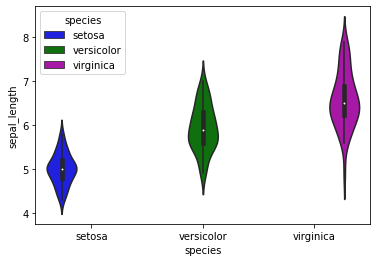

In [111]:
# Change the color of each group 
sns.violinplot(x=df["species"], y=df["sepal_length"],hue="species",data=df,palette=['blue','green','m'])
